¡Hola, Ricardo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Ricardo! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

# Importo librerias

In [1]:
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt 
import seaborn as sns      
import datetime as dt      
import statistics as stats 
import json as js          
import requests as req
from scipy.stats import ttest_ind


# Abro Datasets

In [2]:
compañias = pd.read_csv("/datasets/project_sql_result_01.csv")
viajes = pd.read_csv("/datasets/project_sql_result_04.csv")

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de la información y las librerias necesarias para el análisis. 

# Muestro Informacion, estudio los datos que contienen y me aseguro de que los tipos de datos sean correctos en los datasets.

In [3]:
print(compañias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [20]:
duplicados_compañias = compañias[compañias.duplicated()]
print(f'Duplicados en compañias: {duplicados_compañias.shape[0]}')

Duplicados en compañias: 0


In [4]:
print(viajes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [21]:
duplicados_viajes = viajes[viajes.duplicated()]
print(f'Duplicados en viajes: {duplicados_viajes.shape[0]}')

Duplicados en viajes: 0


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Solamente en estos análisis iniciales te recomiendo hacer la verificación de registros duplicados


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Datastet compañias.

In [5]:
#Muestro compañías con más y con menos viajes
print(compañias.sort_values(by='trips_amount', ascending=False).head(10)) 
print(compañias.sort_values(by='trips_amount').head(10))  

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
                     company_name  trips_amount
63    3556 - 36214 RC Andrews Cab             2
62     2241 - 44667 - Felman Corp             3
61  5874 - 73628 Sergey Cab Corp.             5
60        2733 - 74600 Benny Jona             7
59   4053 - 40193 Adwar H. Nikola             7
58        5062 - 34841 Sam Mestas             8
57                    Metro Group            11
56  5997 - 65283 AW Services Inc.            12
55     

In [6]:
#Veo si hay duplicados en la fila de los nombres de la compañias.
print(compañias['company_name'].value_counts())


3623 - 72222 Arrington Enterprises         1
Dispatch Taxi Affiliation                  1
2823 - 73307 Lee Express Inc               1
5074 - 54002 Ahzmi Inc                     1
City Service                               1
                                          ..
0118 - 42111 Godfrey S. Awir               1
1085 - 72312 N and W Cab Co                1
Top Cab Affiliation                        1
Patriot Taxi Dba Peace Taxi Association    1
Metro Jet Taxi A                           1
Name: company_name, Length: 64, dtype: int64


In [7]:
#Veo si hay valores inusuales
print(compañias[compañias['trips_amount'] < 0])   # No deberían existir
print(compañias['trips_amount'].describe())      # Para ver media, max, min


Empty DataFrame
Columns: [company_name, trips_amount]
Index: []
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64


### Dataset viajes.

In [8]:
# Muestro barrios con mayor y menor promedio
print(viajes.sort_values(by='average_trips', ascending=False).head(10))  # Top 10
print(viajes.sort_values(by='average_trips').head(10))                   # Bottom 10

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667
   dropoff_location_name  average_trips
93             Riverdale       1.800000
92             East Side       1.961538
91              Burnside       2.333333
90             Hegewisch       3.117647
89       Mount Greenwood       3.137931
88                 Undef       3.800000
87               Pullman       3.896552
86           West Elsdon       5.666667
85             Montclare       5.766667
84          West Pullman       6.466667


In [9]:
# Busco promedios fuera de rango lógico
print(viajes[viajes['average_trips'] < 0])  # Debería estar vacío

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [10]:
# Busco barrios duplicados o mal escritos
print(viajes['dropoff_location_name'].value_counts())

Dunning           1
River North       1
Chinatown         1
Uptown            1
West Elsdon       1
                 ..
Albany Park       1
Roseland          1
Lincoln Square    1
Little Village    1
Norwood Park      1
Name: dropoff_location_name, Length: 94, dtype: int64


### Identifico los 10 principales barrios en términos de finalización del recorrido.

In [11]:
top_barrios = viajes.sort_values(by='average_trips', ascending=False).head(10)
print(top_barrios)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Gráficos de empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones 

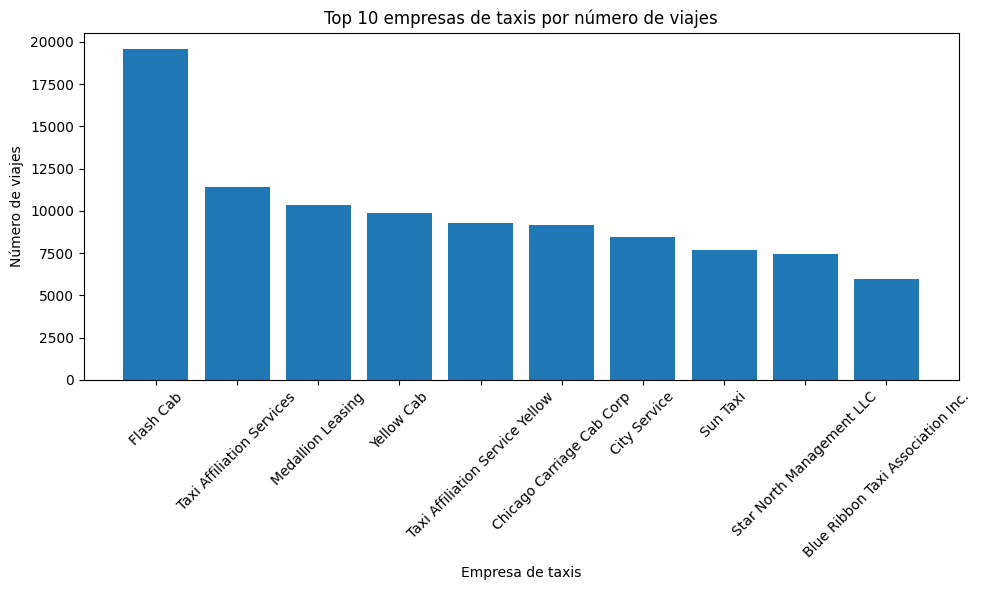

In [12]:
# Gráfico de barras para Top 10 empresas de taxis por número de viajes

# Ordenar y seleccionar el top 10 de compañías
top_10_compañias = compañias.sort_values(by='trips_amount', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_compañias['company_name'], top_10_compañias['trips_amount'])
plt.xticks(rotation=45)
plt.title('Top 10 empresas de taxis por número de viajes')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()


### Análisis del gráfico: Top 10 empresas de taxis por número de viajes (15 y 16 de noviembre de 2017)
El gráfico muestra las diez principales empresas de taxis con mayor número de viajes registrados durante los días 15 y 16 de noviembre de 2017. A partir de los datos visualizados, se pueden extraer las siguientes conclusiones:

Dominio claro de Flash Cab
Flash Cab se posiciona como la empresa líder, con aproximadamente 19,500 viajes en los dos días analizados. Esta cifra representa una diferencia significativa respecto al resto de las compañías, destacándose como la opción más utilizada por los usuarios.

Competencia pareja entre empresas intermedias
Las compañías ubicadas entre el segundo y el noveno lugar —como Taxi Affiliation Services, Medallion Leasing y Yellow Cab— presentan cantidades de viajes relativamente similares, en un rango cercano a los 9,000 a 11,000 viajes. Esto sugiere un entorno competitivo más equilibrado entre estas empresas.

Caída progresiva en el número de viajes
A medida que se desciende en el ranking, se observa una disminución paulatina en la cantidad de viajes. La empresa en décima posición (Blue Ribbon Taxi Association Inc.) registra un volumen significativamente menor en comparación con Flash Cab, evidenciando una concentración del mercado en pocas compañías.

Posibles factores de liderazgo
El liderazgo de Flash Cab podría atribuirse a una mayor flota vehicular, una cobertura territorial más amplia, alianzas estratégicas (por ejemplo, con hoteles o aeropuertos), o bien a un mejor posicionamiento en aplicaciones móviles. Estas hipótesis podrían explorarse con datos adicionales.

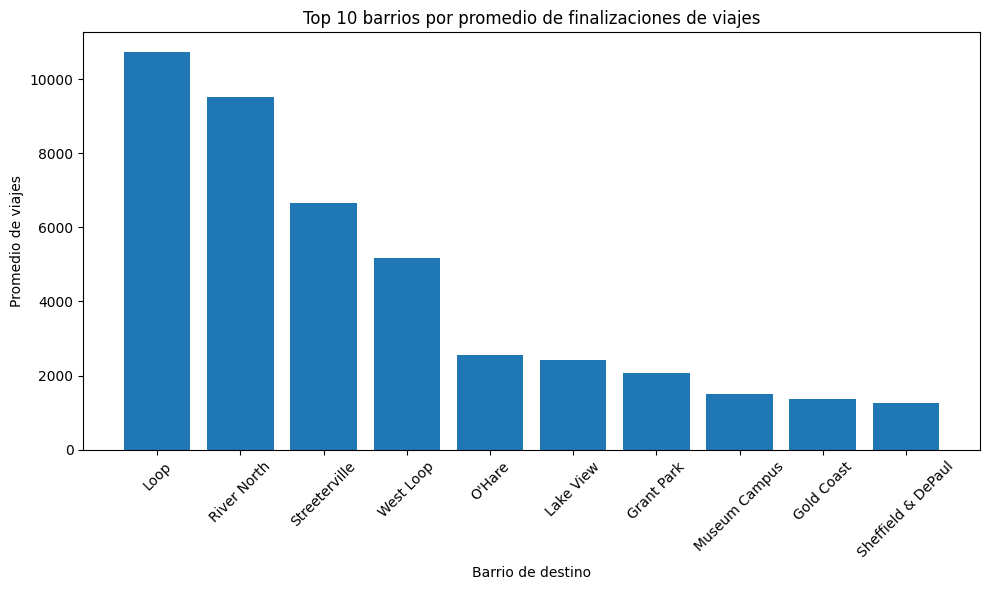

In [13]:
# Gráfico de barras para los 10 barrios principales
plt.figure(figsize=(10, 6))
plt.bar(top_barrios['dropoff_location_name'], top_barrios['average_trips'])
plt.xticks(rotation=45)
plt.title('Top 10 barrios por promedio de finalizaciones de viajes')
plt.xlabel('Barrio de destino')
plt.ylabel('Promedio de viajes')
plt.tight_layout()
plt.show()


### Análisis del gráfico: Top 10 barrios por promedio de finalizaciones de viajes (noviembre 2017)
Este gráfico muestra los diez barrios de Chicago con mayor promedio de finalizaciones de viajes en el mes de noviembre de 2017. A partir de la visualización se pueden destacar los siguientes puntos clave:

El Loop domina ampliamente como destino principal
El barrio "Loop" concentra la mayor cantidad de viajes finalizados, superando los 10,000 en promedio. Esto sugiere que es el centro neurálgico de la ciudad, posiblemente por su actividad económica, turística o institucional.

River North y Streeterville siguen con valores elevados
Ambos barrios también presentan promedios de viajes altos, lo que indica que son zonas con alta demanda de servicios de transporte, probablemente debido a su cercanía con centros comerciales, de entretenimiento o residenciales de alto perfil.

Desigualdad en la distribución de viajes
A partir del cuarto lugar (West Loop), los promedios comienzan a descender notablemente. El décimo barrio, "Sheffield & DePaul", apenas supera los 1,000 viajes promedio, lo cual evidencia una alta concentración de viajes en pocos barrios.

Posibles implicaciones de movilidad urbana
Esta distribución desigual puede reflejar patrones de movilidad comunes en ciudades grandes: mayor concentración en zonas céntricas y comerciales, y menor en áreas residenciales o periféricas. También podría orientar futuras decisiones sobre infraestructura o asignación de servicios de transporte.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de realizar las gráficas para mostrar los resultados.

###  Relación entre ambos análisis
El patrón observado en ambos gráficos sugiere que las empresas más grandes y consolidadas probablemente concentran su operación en las zonas de mayor demanda, como Loop, River North y Streeterville. Esto podría implicar una estrategia de enfoque en áreas de alta rentabilidad, optimizando recursos y aumentando la eficiencia operativa.

En conjunto, los datos destacan la desigualdad tanto en el reparto de viajes entre empresas como en la distribución espacial de la demanda, lo cual ofrece valiosa información para decisiones estratégicas, como el diseño de rutas, asignación de unidades y desarrollo de políticas públicas de movilidad urbana.

# Prueba de hipótesis.

In [14]:
viajes_loop_a_ord = pd.read_csv("/datasets/project_sql_result_07.csv")

In [15]:
print(viajes_loop_a_ord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [19]:
import pandas as pd
from scipy.stats import ttest_ind, levene

# cambio que la columna de fechas en datetime
viajes_loop_a_ord['start_ts'] = pd.to_datetime(viajes_loop_a_ord['start_ts'])

# Filtro solo sábados
sabados = viajes_loop_a_ord[viajes_loop_a_ord['start_ts'].dt.dayofweek == 5]

# Separo por condición climática
sabados_good = sabados[sabados['weather_conditions'] == 'Good']
sabados_bad = sabados[sabados['weather_conditions'] == 'Bad']

# Extraego duración de los viajes
dur_good = sabados_good['duration_seconds']
dur_bad = sabados_bad['duration_seconds']

# Hago estadísticas descriptivas
print("Estadísticas descriptivas:")
print(f"Sábados Good -> cantidad: {len(dur_good)}, media: {dur_good.mean():.2f}, std: {dur_good.std():.2f}")
print(f"Sábados Bad  -> cantidad: {len(dur_bad)}, media: {dur_bad.mean():.2f}, std: {dur_bad.std():.2f}")

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = levene(dur_bad, dur_good)
print("Prueba de Levene (igualdad de varianzas):")
print(f'Estadístico: {stat_levene:.2f}, valor p: {p_levene:.4f}')

# Determino si asumimos igualdad de varianzas
equal_var = p_levene > 0.05
print(f'¿Asumimos varianzas iguales?: {equal_var}')

# Prueba t
stat_ttest, p_ttest = ttest_ind(dur_bad, dur_good, equal_var=equal_var)
print("Prueba t de Student:")
print(f'Estadístico t: {stat_ttest:.2f}, valor p: {p_ttest:.4f}')

alpha = 0.05
if p_ttest < alpha:
    print("Se rechaza H₀: hay evidencia de que la duración promedio cambia en sábados lluviosos.")
else:
    print("No se rechaza H₀: no hay evidencia suficiente de que la duración promedio cambia en sábados lluviosos.")




Estadísticas descriptivas:
Sábados Good -> cantidad: 888, media: 1999.68, std: 759.20
Sábados Bad  -> cantidad: 180, media: 2427.21, std: 721.31
Prueba de Levene (igualdad de varianzas):
Estadístico: 0.39, valor p: 0.5332
¿Asumimos varianzas iguales?: True
Prueba t de Student:
Estadístico t: 6.95, valor p: 0.0000
Se rechaza H₀: hay evidencia de que la duración promedio cambia en sábados lluviosos.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función:
    
    levene(dur_bad, dur_good)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales.
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### La pregunta original era:

¿La duración promedio de los viajes desde el Loop hasta el Aeropuerto cambia los sábados lluviosos?

Esta es una comparación de medias entre dos grupos:

Viajes los sábados con clima malo (Bad) = lluviosos

Viajes los sábados con clima bueno (Good) = sin lluvia

Entonces, se plantearon así:

Hipótesis nula (H₀):
La duración promedio de los viajes es igual entre sábados con lluvia y sábados sin lluvia.
Matemáticamente:

μ 
Bad
​
 =μ 
Good
​
 
Hipótesis alternativa (H₁):
La duración promedio de los viajes cambia entre sábados con lluvia y sin lluvia.
Matemáticamente:

𝜇
Bad
≠
𝜇
Good
​

 
Es una prueba bilateral, ya que no se especificó si esperábamos más o menos duración, sólo un cambio.



### ¿Qué criterio se usó para probar las hipótesis y por qué?
Criterio usado para probar las hipótesis
1. Prueba de Levene (para verificar igualdad de varianzas)
Antes de aplicar la prueba t, se usó la prueba de Levene para determinar si las varianzas de los dos grupos eran iguales:

H₀ de Levene: Las varianzas son iguales.

Valor p obtenido: 0.5332 → No se rechaza H₀.

Decisión: Se puede asumir igualdad de varianzas → equal_var=True.

2. Prueba t de Student (t-test)
Con base en el resultado de Levene, se aplicó un t-test para muestras independientes con varianzas iguales:

Se compararon las medias de duración de los viajes entre sábados con y sin lluvia.

Nivel de significancia adoptado: α = 0.05

Valor p obtenido: 0.0000


### Criterio de decisión:
Conclusión del criterio:
Como p < 0.05, se rechaza la hipótesis nula.

Hay evidencia suficiente para afirmar que la duración promedio de los viajes sí cambia los sábados lluviosos.

### Conclusión general:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto sí cambia significativamente los sábados lluviosos.
En promedio, los viajes con mal clima duran aproximadamente 7 minutos más.
La diferencia es estadísticamente significativa, lo que sugiere que la lluvia afecta negativamente el tiempo de traslado.
Esto podría deberse a factores como el tráfico, las condiciones viales o la precaución adicional de los conductores durante el mal tiempo.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Ricardo, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>